# Derivation of the cauchy BC

We would like to derive the cauchy BC, which for a field $f$ reads

$$
f(0) = a\\
\partial_z f\big|_0 = b
$$

**WARNING**: This scheme is only first order convergent

In [1]:
from IPython.display import display
from sympy import init_printing
from sympy import symbols, as_finite_diff, solve, latex
from sympy import Function, Eq

fg, f0, f1, f2 = symbols('f_g, f_0, f_1, f_2')
z, h = symbols('z, h')
a, b = symbols('a, b')
f = Function('f')

init_printing()

Extrapolation of $f(0) = a$ to the ghost point yields (see [ghost4thOrder](boundaryPolynomials/ghost4thOrder.ipynb) for calculation) yields

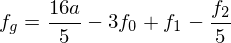

In [2]:
extraPolate = Eq(fg, 16*a/5 - 3*f0 + f1 - f2/5)
display(extraPolate)

Which can be rewritten to

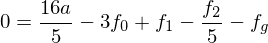

In [3]:
eq1 = Eq(0, extraPolate.rhs - extraPolate.lhs)
display(eq1)

Furthermore a second order FD of $\partial_z f\big|_0 = b$ reads

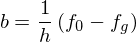

In [4]:
deriv = as_finite_diff(f(z).diff(z), [z-h/2, z+h/2])
deriv = Eq(b ,deriv.subs([(f(z-h/2),  fg),\
                          (f(z+h/2),   f0),\
                         ]).together())
display(deriv)

Which can be rewritten to

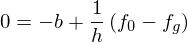

In [5]:
eq2 = Eq(0, deriv.rhs - deriv.lhs)
display(eq2)

Thus

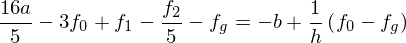

In [6]:
full = Eq(eq1.rhs, eq2.rhs)
display(full)

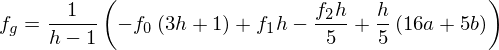

In [7]:
fullSolvedForFg = Eq(fg, solve(full, fg)[0].collect(symbols('f_0, f_1, f_2, h'), exact=True).simplify())
display(fullSolvedForFg)

In [8]:
print(latex(fullSolvedForFg))

f_{g} = \frac{1}{h - 1} \left(- f_{0} \left(3 h + 1\right) + f_{1} h - \frac{f_{2} h}{5} + \frac{h}{5} \left(16 a + 5 b\right)\right)
